# Diabetic Retinopathy classification 
## Using DNN PyTorch, SVM AND KNN
<i>Debrecen | DataSet</i>
***

## Overview 
Classification problems belong to machine learning category where given a set of feature, the task to predict a discrete value.

In this notbook given features  features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not.

All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor. The underlying method image analysis and feature extraction as well as our classification technique is described in Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27. The image set (Messidor) is available at <a href="http://messidor.crihan.fr/index-en.php">[Web Link]</a>

## General Outline

### Step(1): Downloading The Data
you can download the dataset with .arff attribute from <a href='http://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff'>HERE</a>

> Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27.

| Data Set Characteristics | |
| --- | --- | 
| Number of Instances | 1151 |
| Area | Life |
| Attribute Characteristics | Integer, Real |
| Number of Attributes | 20 |
| Date Donated | 2014-11-03 |
| Associated Tasks | Classification |
| Missing Values? | N/A |
| Number of Web Hits | 98680 |



In [1]:
import torch # powerful for N-dimensional array
import torch.nn as nn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.io import arff # read data from and write data to a variety of file formats

data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])
dataset = df

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


>you can see that our dataset is having 20 columns, our job is to predict the value of the 20th column: `Class`. 

In [3]:
dataset.shape

(1151, 20)

The output shows that the dataset has 1151 records and 20 columns.

In [4]:
#Calculate some statistical data
df.describe() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921648,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000


In [5]:
#Missing Values Check
df.isnull().sum().sum()

0

In [6]:
#Image Quality Assessment - 0 = bad quality 1 = sufficient quality
df['0'].value_counts()

1.0    1147
0.0       4
Name: 0, dtype: int64

image quality assessment, we have assumed that all the features extracted from the image processing algorithms were of sufficient quality for every patient and 4 of them being the exception cases. Our assumption was homogeneity of all the cases and ignoring the 4 exceptions out of 1147 others.

In [7]:
#Pre-Screening - Severe Retinal Abnormality -1 Lacking Retinal Abnormality - 0
df['1'].value_counts()

1.0    1057
0.0      94
Name: 1, dtype: int64

## Feature indexes
`q `- The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.

`ps `- The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.

`nma.a` - nma.f - The results of microaneurism detection. Each feature value stand for the number of microaneurisms found at the confidence levels alpha = 0.5, . . . , 1, respectively.

`nex.a` - nex.f - contains the same information as nma.a - nma.f for exudates. However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes.

`dd` - The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patients condition. This feature is also normalized with the diameter of the ROI.

`dm` - The diameter of the optic disc.

`amfm` - The binary result of the AM/FM-based classification.

`class` - Class label. 1 = contains signs of Diabetic Retinopathy, 0 = no signs of Diabetic Retinopathy.

## Exudate Detection
Exudates are primary signs of diabetic retinopathy and occur when lipid or fat leak from blood vessels or aneurysms. Exudates are bright, small spots, which can have an irregular shape.

![alt text](https://camo.githubusercontent.com/8d4c175cb54ac6bd74a9f90eb91fade8fab5ca27/68747470733a2f2f692e696d6775722e636f6d2f317873676150542e706e67 "Logo Title Text 1")


/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


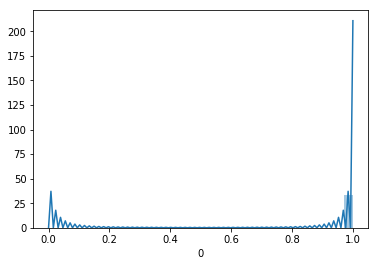

In [8]:
sns.distplot(df['0']);
plt.show()

92% of the patients are facing severe abnormality.

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/e

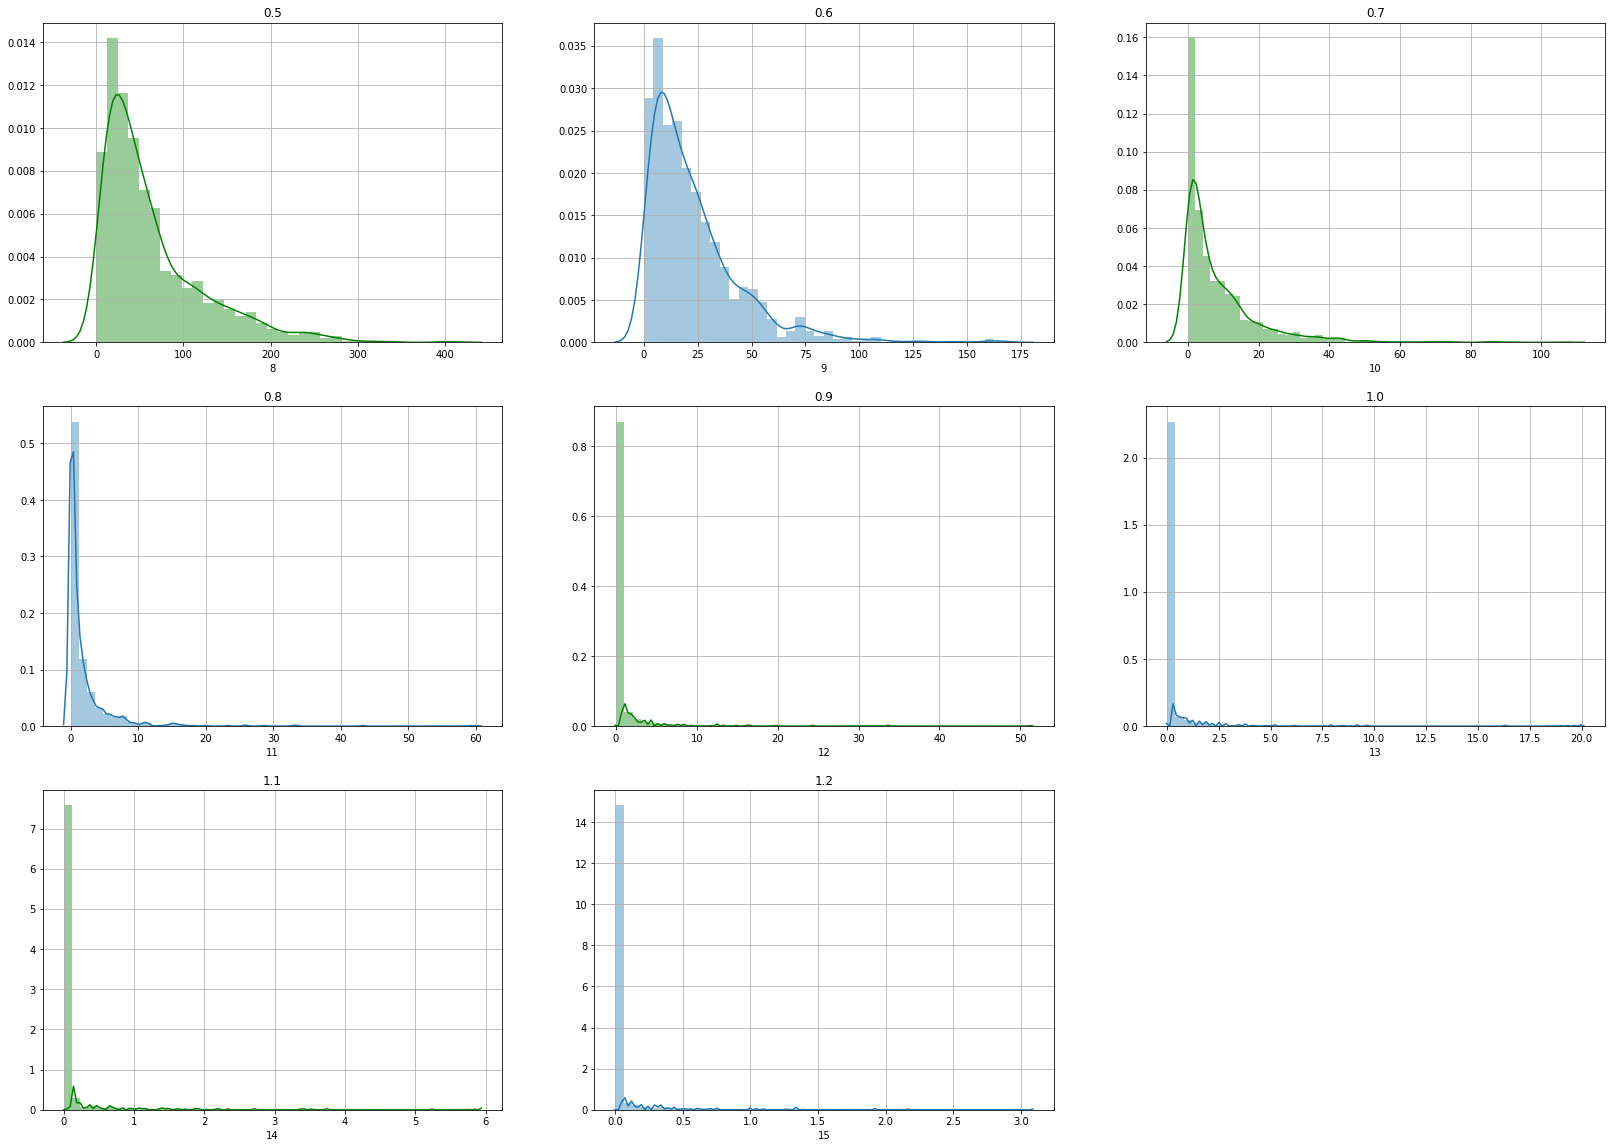

In [9]:
plt.figure(1, figsize=(28, 20),)
hfont = {'fontname':'DejaVu Sans'}

plt.subplot(331)
sns.distplot(df["8"],color = 'green');
plt.title("0.5")
plt.grid(True)

plt.subplot(332)
sns.distplot(df["9"]);
plt.title("0.6")
plt.grid(True)

plt.subplot(333)
sns.distplot(df["10"],color = 'green');
plt.title("0.7")
plt.grid(True)

plt.subplot(334)
sns.distplot(df["11"]);
plt.title("0.8")
plt.grid(True)

plt.subplot(335)
sns.distplot(df["12"],color = 'green');
plt.title("0.9")
plt.grid(True)

plt.subplot(336)
sns.distplot(df["13"]);
plt.title("1.0")
plt.grid(True)

plt.subplot(337)
sns.distplot(df["14"],color = 'green');
plt.title("1.1")
plt.grid(True)

plt.subplot(338)
sns.distplot(df["15"]);
plt.title("1.2")
plt.grid(True)

plt.show()


## Data Preprocessing 

Before we train our PyTorch model, we need to preprocess our data. If you look at the dataset, you will see that it has two types of columns: `Numerical` and `Categorica`l. The numerical columns contains numerical information. like `3-16` columns.

Similarly, categorical columns since they contain categorical information. like `class` column.

>we can observe that categorical columns are just `['0', '1', '18']` and the remaining columns are numircal columns 


In [10]:
# seprate dataset into numerical and categorical 

categorical_columns = ['0', '1', '18']
numerical_columns = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17']


In [11]:
# setting predicting variable 

outputs = ['Class']


We have created lists of categorical, numeric, and output columns. However, at the moment the type of the categorical columns is not categorical. You can check the type of all the columns in the dataset with the following script:

In [12]:
dataset.dtypes 

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
Class     object
dtype: object

you can see that `['0', '1', '18']` is still float numbers even those columns considered to ba categorical, because the values are 0/1.

We need to convert the types for categorical columns to category. We can do so using the `astype()` function, as shown below:

In [13]:
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

Now if you again plot the types for the columns in our dataset.

In [14]:
dataset.dtypes 

0        category
1        category
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
10        float64
11        float64
12        float64
13        float64
14        float64
15        float64
16        float64
17        float64
18       category
Class      object
dtype: object

Let's now see all the categories in the `1` column

In [15]:
dataset['1'].cat.categories

Float64Index([0.0, 1.0], dtype='float64')

In [16]:
dataset['1'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: 1, dtype: category
Categories (2, float64): [0.0, 1.0]

***
<p>The basic purpose of separating categorical columns from the numerical columns is that values in the numerical column can be directly fed into neural networks. However, the values for the categorical columns first have to be converted into numeric types. The coding of the values in the categorical column partially solves the task of numerical conversion of the categorical columns.

Since we will be using PyTorch for model training, we need to convert our categorical and numerical columns to tensors.

Let's first convert the categorical columns to tensors. In PyTorch, tensors can be created via the numpy arrays. We will first convert data in the four categorical columns into numpy arrays and then stack all the columns horizontally, as shown in the following script:</p>
***

In [17]:
# stack categorical columns into array
q = dataset['0'].cat.codes.values
ps = dataset['1'].cat.codes.values
amfm = dataset['18'].cat.codes.values


categorical_data = np.stack([q, ps, amfm], 1)

categorical_data[:10]

array([[1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0]], dtype=int8)

Now to create a `tensor` from the aforementioned numpy array, you can simply pass the array to the tensor class of the `torch module`. Remember, for the categorical columns the data type should be torch.int64.

In [18]:
# creating tensor 
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[1, 1, 1],
        [1, 1, 0],
        [1, 1, 0],
        [1, 1, 0],
        [1, 1, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 1, 1],
        [1, 1, 0],
        [1, 1, 0]])

n the output, you can see that the numpy array of categorical data has now been converted into a tensor object.

In the same way, we can convert our numerical columns to tensors:

In [19]:
numerical_data = np.stack([dataset[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]

tensor([[2.2000e+01, 2.2000e+01, 2.2000e+01, 1.9000e+01, 1.8000e+01, 1.4000e+01,
         4.9896e+01, 1.7776e+01, 5.2709e+00, 7.7176e-01, 1.8632e-02, 6.8640e-03,
         3.9230e-03, 3.9230e-03, 4.8690e-01, 1.0002e-01],
        [2.4000e+01, 2.4000e+01, 2.2000e+01, 1.8000e+01, 1.6000e+01, 1.3000e+01,
         5.7710e+01, 2.3800e+01, 3.3254e+00, 2.3418e-01, 3.9030e-03, 3.9030e-03,
         3.9030e-03, 3.9030e-03, 5.2091e-01, 1.4441e-01],
        [6.2000e+01, 6.0000e+01, 5.9000e+01, 5.4000e+01, 4.7000e+01, 3.3000e+01,
         5.5831e+01, 2.7994e+01, 1.2687e+01, 4.8523e+00, 1.3939e+00, 3.7325e-01,
         4.1817e-02, 7.7440e-03, 5.3090e-01, 1.2855e-01],
        [5.5000e+01, 5.3000e+01, 5.3000e+01, 5.0000e+01, 4.3000e+01, 3.1000e+01,
         4.0467e+01, 1.8446e+01, 9.1189e+00, 3.0794e+00, 8.4026e-01, 2.7243e-01,
         7.6530e-03, 1.5310e-03, 4.8328e-01, 1.1479e-01],
        [4.4000e+01, 4.4000e+01, 4.4000e+01, 4.1000e+01, 3.9000e+01, 2.7000e+01,
         1.8026e+01, 8.5707e+00, 4.1038

The final step is to convert the output numpy array into a `tensor` object.

In [20]:
df['Class'] = df['Class'].astype(int) #convert the column to int first because the values of this column are objects

outputs = torch.tensor(dataset[outputs].values).flatten()
outputs[:5]

tensor([0, 0, 1, 0, 1])

In [21]:
# plotting the shape of categorical and numrical data shappe 
print(categorical_data.shape)
print(numerical_data.shape)
print(outputs.shape)

torch.Size([1151, 3])
torch.Size([1151, 16])
torch.Size([1151])


***
There is a one very important step before we can train our model. We converted our categorical columns to numerical where a unique value is represented by a single integer. For instance, in the `0 column`, we saw that bad result is represented by 0 and good result is represented by 1. We can use these values to train our model. However, a better way is to represent values in a categorical column is in the form of an N-dimensional vector, instead of a single integer. A vector is capable of capturing more information and can find relationships between different categorical values in a more appropriate way. Therefore, we will represent values in the categorical columns in the form of N-dimensional vectors. This process is called `embedding`.

We need to define the `embedding size` (vector dimensions) for all the categorical columns. There is no hard and fast rule regarding the number of dimensions. A good rule of thumb to define the embedding size for a column is to divide the number of unique values in the column by 2 (but not exceeding 50). 
***

In [22]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(2, 1), (2, 1), (2, 1)]


In [23]:
#divide our dataset into training and test sets
total_records = 1151
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

To verify that we have correctly divided data into training and test sets, let's print the lengths of the training and test records

In [24]:
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

921
921
921
230
230
230


## Creating a Model for Prediction

We have divided the data into training and test sets, now is the time to define our model for training. To do so, we can define a class named Model, which will be used to train the model.

In [25]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

## Training the Model
To train the model, first we have to create an object of the Model class that we defined

In [26]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 2, [200,50,50], p=0.4) 

In [27]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=2, bia

Before we can actually train our model, we need to define the loss function and the optimizer that will be used to train the model. Since, we are solving a classification problem, we will use the `cross entropy loss`. For the optimizer function, we will use the `adam optimizer`.

In [28]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [29]:
#train the model 
epochs = 350
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.78745526
epoch:  26 loss: 0.64147854
epoch:  51 loss: 0.60191745
epoch:  76 loss: 0.58046484
epoch: 101 loss: 0.54408729
epoch: 126 loss: 0.53328359
epoch: 151 loss: 0.53456765
epoch: 176 loss: 0.51158649
epoch: 201 loss: 0.52009577
epoch: 226 loss: 0.49199170
epoch: 251 loss: 0.48940426
epoch: 276 loss: 0.47975168
epoch: 301 loss: 0.47136438
epoch: 326 loss: 0.44813487
epoch: 350 loss: 0.4558863342


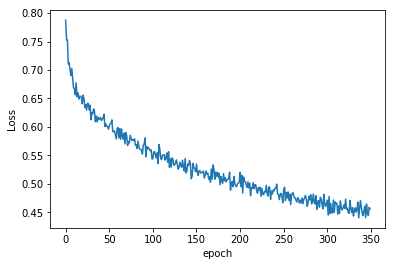

In [30]:
#plot loss against loss
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

## Making Predictions

The last step is to make predictions on the test data. To do so, we simply need to pass the `categorical_test_data` and `numerical_test_data` to the model class. The values returned can then be compared with the actual test output values.

In [31]:
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.51435775


In [32]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 1])


Finally, we can use the `confusion_matrix`, `accuracy_score`, and` classification_report classes` from the `sklearn.metrics module` to find the accuracy, precision, and recall values for the test set, along with the confusion matrix.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[89 25]
 [37 79]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       114
           1       0.76      0.68      0.72       116

   micro avg       0.73      0.73      0.73       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.73      0.73      0.73       230

0.7304347826086957


In [34]:
data = df.drop(['Class'], axis=1)

In [35]:
target = df["Class"]

In [36]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(data, df["Class"], test_size=0.30, random_state=42)

In [37]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
predicted_KNN = model.predict(X_test)

In [38]:
accuracy_score(y_test, predicted_KNN)

0.615606936416185